# Visualize Metric Components

This notebook loads a metric field saved in `.npz` and plots each component over the unit square,
plus eigenvectors scaled by `sqrt(eigenvalues)`.

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

npz_path = Path("../data/harmonic_block6/Mp.npz")
data = np.load(npz_path)
print("Keys:", sorted(data.files))

M11 = data["M11"]
M12 = data["M12"]
M22 = data["M22"]

if "X1" in data and "X2" in data:
    X1 = data["X1"]
    X2 = data["X2"]
else:
    x1 = data["x1"]
    x2 = data["x2"]
    X1, X2 = np.meshgrid(x1, x2)

print("Grid shape:", X1.shape, X2.shape)
print("Component shape:", M11.shape, M12.shape, M22.shape)

Keys: ['M11', 'M12', 'M22', 'X1', 'X2', 'x1', 'x2']
Grid shape: (37, 110) (37, 110)
Component shape: (37, 110) (37, 110) (37, 110)


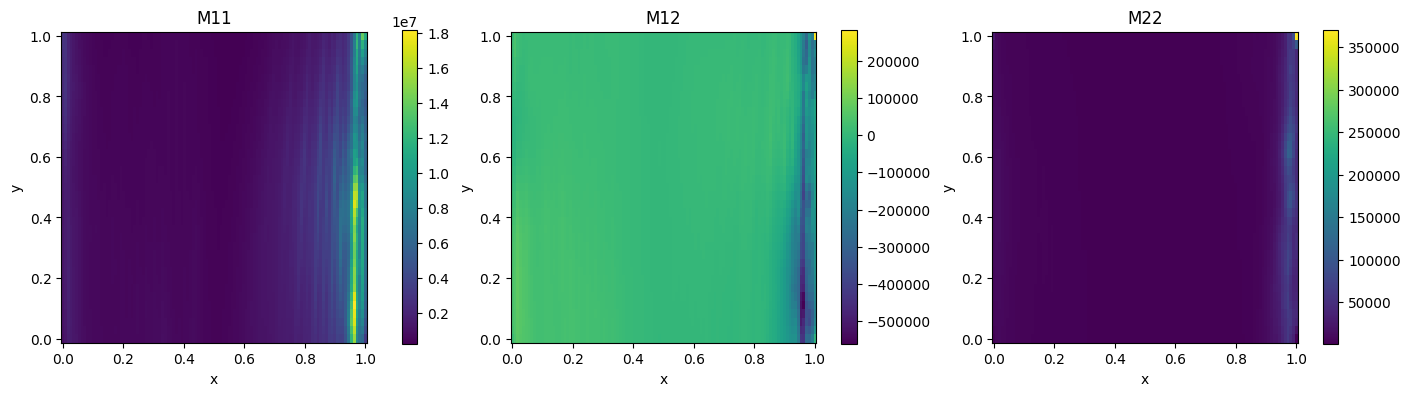

In [35]:
def plot_component(ax, X, Y, Z, title):
    im = ax.pcolormesh(X, Y, Z, shading="auto")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect("equal", "box")
    plt.colorbar(im, ax=ax, shrink=0.85)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)
plot_component(axes[0], X1, X2, M11, "M11")
plot_component(axes[1], X1, X2, M12, "M12")
plot_component(axes[2], X1, X2, M22, "M22")
plt.show()

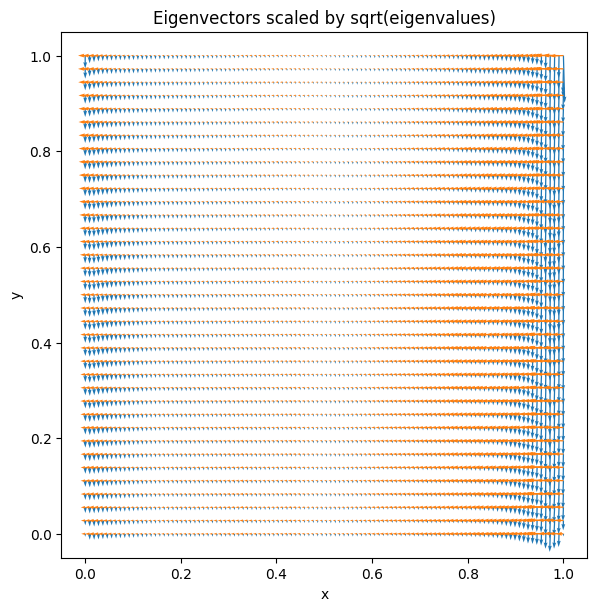

In [36]:
# Eigenvectors scaled by sqrt(eigenvalues)
M = np.stack(
    [
        np.stack([M11, M12], axis=-1),
        np.stack([M12, M22], axis=-1),
    ],
    axis=-2,
)

eigvals, eigvecs = np.linalg.eigh(M)
eigvals = np.clip(eigvals, 0.0, None)
scale = np.sqrt(eigvals)
v1 = eigvecs[..., :, 0] * scale[..., 0:1]
v2 = eigvecs[..., :, 1] * scale[..., 1:2]

step = max(min(M11.shape) // 25, 1)
Xs = X1[::step, ::step]
Ys = X2[::step, ::step]
v1s = v1[::step, ::step]
v2s = v2[::step, ::step]

fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
ax.quiver(Xs, Ys, v1s[..., 0], v1s[..., 1], color="tab:blue", angles="xy")
ax.quiver(Xs, Ys, v2s[..., 0], v2s[..., 1], color="tab:orange", angles="xy")
ax.set_title("Eigenvectors scaled by sqrt(eigenvalues)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal", "box")
plt.show()

## Physical-space metric

This section loads `M.npz` and `X.npz` and plots the metric components and 
eigenvectors in physical space.


Physical metric keys: ['M11', 'M12', 'M22', 'X1', 'X2', 'x1', 'x2']
Grid keys: ['X1', 'X2', 'x1', 'x2']
Physical grid shape: (37, 110) (37, 110)
Physical component shape: (37, 110) (37, 110) (37, 110)


/var/folders/ps/xk3hpl_12hl8mxh4mflt_kh80000gn/T/ipykernel_13065/1100553744.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(X, Y, Z, shading="auto")


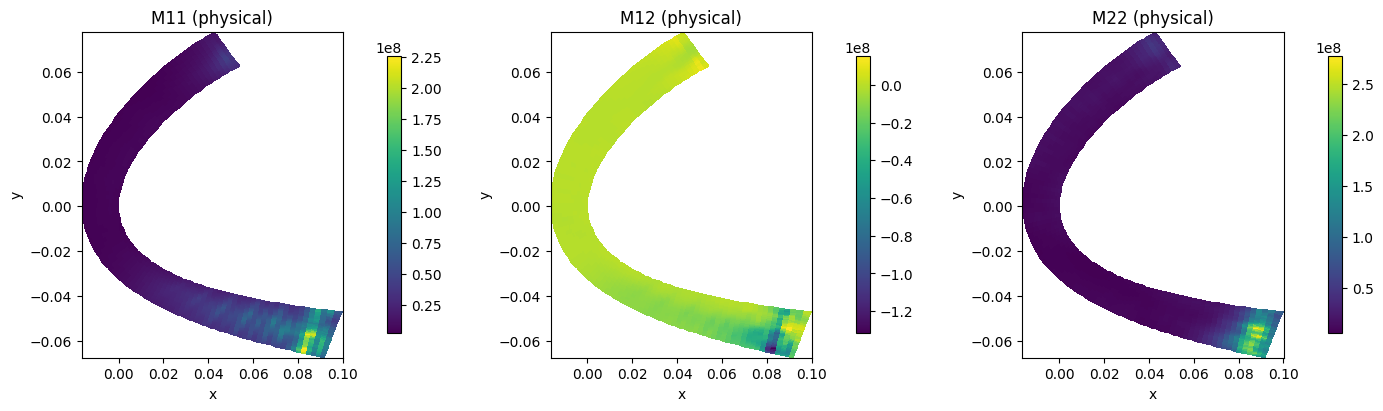

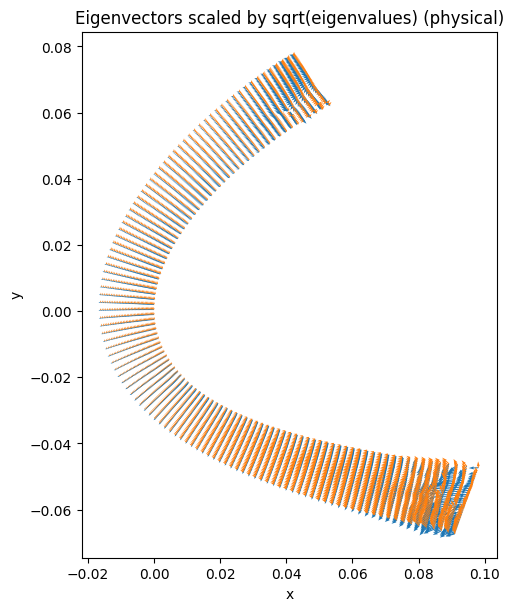

In [37]:
phys_metric_path = Path("../data/harmonic_block9/M.npz")
if not phys_metric_path.exists():
    alt_metric_path = Path("..") / "data/harmonic_block9/M.npz"
    phys_metric_path = alt_metric_path if alt_metric_path.exists() else None

phys_grid_path = Path("../data/harmonic_block9/X.npz")
if not phys_grid_path.exists():
    alt_grid_path = Path("..") / "data/harmonic_block9/X.npz"
    phys_grid_path = alt_grid_path if alt_grid_path.exists() else None

if phys_metric_path is None or phys_grid_path is None:
    print("Skipping physical-space metric: M.npz or X.npz not found.")
else:
    phys_data = np.load(phys_metric_path)
    grid_data = np.load(phys_grid_path)
    print("Physical metric keys:", sorted(phys_data.files))
    print("Grid keys:", sorted(grid_data.files))

    M11_p = phys_data["M11"]
    M12_p = phys_data["M12"]
    M22_p = phys_data["M22"]

    if "X1" in grid_data and "X2" in grid_data:
        X1_p = grid_data["X1"]
        X2_p = grid_data["X2"]
    else:
        x1_p = grid_data["x1"]
        x2_p = grid_data["x2"]
        X1_p, X2_p = np.meshgrid(x1_p, x2_p)

    print("Physical grid shape:", X1_p.shape, X2_p.shape)
    print("Physical component shape:", M11_p.shape, M12_p.shape, M22_p.shape)

    fig, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)
    plot_component(axes[0], X1_p, X2_p, M11_p, "M11 (physical)")
    plot_component(axes[1], X1_p, X2_p, M12_p, "M12 (physical)")
    plot_component(axes[2], X1_p, X2_p, M22_p, "M22 (physical)")
    plt.show()

    M_p = np.stack(
        [
            np.stack([M11_p, M12_p], axis=-1),
            np.stack([M12_p, M22_p], axis=-1),
        ],
        axis=-2,
    )

    eigvals, eigvecs = np.linalg.eigh(M_p)
    eigvals = np.clip(eigvals, 0.0, None)
    scale = np.sqrt(eigvals)
    v1 = eigvecs[..., :, 0] * scale[..., 0:1]
    v2 = eigvecs[..., :, 1] * scale[..., 1:2]

    step = max(min(M11_p.shape) // 25, 1)
    Xs = X1_p[::step, ::step]
    Ys = X2_p[::step, ::step]
    v1s = v1[::step, ::step]
    v2s = v2[::step, ::step]

    fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
    ax.quiver(Xs, Ys, v1s[..., 0], v1s[..., 1], color="tab:blue", angles="xy")
    ax.quiver(Xs, Ys, v2s[..., 0], v2s[..., 1], color="tab:orange", angles="xy")
    ax.set_title("Eigenvectors scaled by sqrt(eigenvalues) (physical)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect("equal", "box")
    plt.show()
